In [1]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [55]:
df = pd.read_csv('Bitcoin Historical Data0330.csv')

df['Date'] = pd.to_datetime(df['Date'])

df1 = df.set_index(['Date'])
#df1 = df1.loc[:, ['Price']]
df1['Price'] = df1['Price'].str.replace(',', '').astype('float')
df1['Open'] = df1['Open'].str.replace(',', '').astype('float')
df1['High'] = df1['High'].str.replace(',', '').astype('float')
df1['Low'] = df1['Low'].str.replace(',', '').astype('float')
df1['Change %'] = df1['Change %'].str.replace('%', '').astype('float')

for i in range(len(list(df1['Vol.']))):
    if list(df1['Vol.'])[i].endswith('K'):
        temp = list(df1['Vol.'])[i].replace('K', '')
        df1['Vol.'][i] = float(temp) * 1000
    else:
        temp2 = list(df1['Vol.'])[i].replace('M', '')
        df1['Vol.'][i] = float(temp2) * 1000000
        
df1['Vol.'] = df1['Vol.'].astype('int')

#df1.reset_index(inplace=True)

df1 = df1.loc[::-1]
#df1 = df1.set_index(['Date'])
df1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-01-01,314.9,318.2,321.4,313.5,12820,-1.05
2015-01-02,315.2,314.9,316.4,313.1,14730,0.10
2015-01-03,287.1,315.2,315.8,284.9,47370,-8.91
2015-01-04,264.7,287.1,289.9,255.9,88770,-7.80
2015-01-05,274.8,264.7,278.3,262.9,54990,3.82
...,...,...,...,...,...,...
2021-03-26,55036.1,51317.4,55074.1,51302.0,100300,7.24
2021-03-27,55862.9,55033.8,56531.1,54010.2,73870,1.50
2021-03-28,55765.2,55856.9,56504.2,54711.3,58710,-0.17


In [56]:
df1.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.          int32
Change %    float64
dtype: object

In [57]:
df_p = df1.loc[:, ['Price']]

In [58]:
kospi= fdr.DataReader("KS11","2015")
sp = fdr.DataReader("US500","2015")

code_list = ["KS11","US500"]
index_list = [fdr.DataReader(code, "2015")["Close"] for code in code_list]
ks_sp =pd.concat(index_list,axis=1)

ks_sp.columns = code_list
ks_sp.columns

ks_sp.dropna()

,KS11,US500
Date,,
2015-01-02,1926.44,2058.20
2015-01-05,1915.75,2020.58
2015-01-06,1882.45,2002.61
2015-01-07,1883.83,2025.90
2015-01-08,1904.65,2062.14
...,...,...
2021-03-23,3004.74,3910.52
2021-03-24,2996.35,3889.14
2021-03-25,3008.33,3909.52


In [60]:
coin = pd.DataFrame(df1['Change %'])
coin.columns = ['Bitcoin']
ks_sp_coin_price = pd.concat([ks_sp, coin], axis=1)
ks_sp_coin_price

,KS11,US500,Bitcoin
Date,,,
2015-01-01,NaN,NaN,-1.05
2015-01-02,1926.44,2058.20,0.10
2015-01-03,NaN,NaN,-8.91
2015-01-04,NaN,NaN,-7.80
2015-01-05,1915.75,2020.58,3.82
...,...,...,...
2021-03-26,3041.01,3974.54,7.24
2021-03-27,NaN,NaN,1.50
2021-03-28,NaN,NaN,-0.17


In [174]:
ks_sp_coin_price_drop = ks_sp_coin_price.dropna()
ks_sp_coin_price_drop

,KS11,US500,Bitcoin
Date,,,
2015-01-02,1926.44,2058.20,0.10
2015-01-05,1915.75,2020.58,3.82
2015-01-06,1882.45,2002.61,2.70
2015-01-07,1883.83,2025.90,3.21
2015-01-08,1904.65,2062.14,-2.97
...,...,...,...
2021-03-23,3004.74,3910.52,0.54
2021-03-24,2996.35,3889.14,-3.91
2021-03-25,3008.33,3909.52,-1.92


In [175]:
ks_sp_coin_price_drop['KS11'] = round(ks_sp_coin_price_drop['KS11'].pct_change() * 100, 3)
ks_sp_coin_price_drop['US500'] = round(ks_sp_coin_price_drop['US500'].pct_change() * 100, 3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [178]:
ks_sp_coin_price_drop = ks_sp_coin_price_drop.dropna()

In [267]:
ks_sp_coin_price1 = ks_sp_coin_price_drop.loc['2015-01-01':'2017-10-31']
ks_sp_coin_price2 = ks_sp_coin_price_drop.loc['2017-11-01':'2019-12-31']
ks_sp_coin_price3 = ks_sp_coin_price_drop.loc['2020-01-01':'2021-03-30']

# 1기 US500-Bitcoin 예측

In [268]:
adfuller_test = adfuller(ks_sp_coin_price1['KS11'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -25.86954788180757
p-value: 0.0


In [269]:
adfuller_test = adfuller(ks_sp_coin_price1['US500'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -15.131644035819775
p-value: 7.217581038203577e-28


In [270]:
adfuller_test = adfuller(ks_sp_coin_price1['Bitcoin'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -20.73241883029436
p-value: 0.0


In [271]:
mydata_diff1 = ks_sp_coin_price1.diff().dropna()

In [272]:
mydata_diff1

,KS11,US500,Bitcoin
Date,,,
2015-01-06,-1.183,0.939,-1.12
2015-01-07,1.811,2.052,0.51
2015-01-08,1.032,0.626,-6.18
2015-01-09,-0.052,-2.629,4.84
2015-01-12,-1.248,0.031,-0.15
...,...,...,...
2017-10-25,0.063,-0.628,10.63
2017-10-26,-0.557,0.593,-1.33
2017-10-27,1.121,0.680,-4.77


In [273]:
adfuller_test = adfuller(mydata_diff1['KS11'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -11.656668908517373
p-value: 1.9778772018459484e-21


In [274]:
adfuller_test = adfuller(mydata_diff1['US500'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -11.904206578687537
p-value: 5.484712698105011e-22


In [275]:
adfuller_test = adfuller(mydata_diff1['Bitcoin'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -11.689092661316378
p-value: 1.669411262931339e-21


In [276]:
mydata_diff2 = mydata_diff1.loc[:, ['US500', 'Bitcoin']]

In [277]:
train = mydata_diff2.iloc[:-10,:]
test = mydata_diff2[-10:]

In [278]:
forecasting_model = VAR(train)
results_aic = []
for p in range(1,50):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


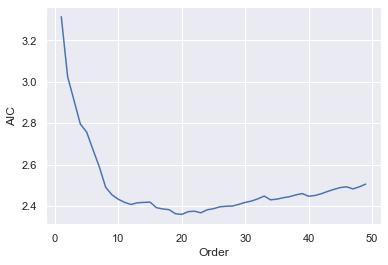

In [279]:
sns.set()
plt.plot(list(np.arange(1,50,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [280]:
results = forecasting_model.fit(20)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Mar, 2021
Time:                     15:28:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.92865
Nobs:                     643.000    HQIC:                   2.58012
Log likelihood:          -2501.20    FPE:                    10.5850
AIC:                      2.35909    Det(Omega_mle):         9.35408
--------------------------------------------------------------------
Results for equation US500
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001463         0.032499            0.045           0.964
L1.US500           -1.002209         0.040623          -24.671           0.000
L1.Bitcoin          0.008633         0.008996            0.960      

In [281]:
laaged_values = train.values[-20:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=10), index = test.index, columns= ['realUS500_1d', 'realBIT_1d'])
forecast

,realUS500_1d,realBIT_1d
Date,,
2017-10-18,0.605596,2.842289
2017-10-19,-0.567647,4.212083
2017-10-20,-0.151885,-3.633287
2017-10-23,-0.111427,-0.083788
2017-10-24,-0.025461,1.347498
2017-10-25,0.618761,-0.673202
2017-10-26,-0.072772,1.040803
2017-10-27,-0.115899,-0.075974
2017-10-30,-0.144593,0.530116


In [282]:
forecast["realUS500_forecasted"] = ks_sp_coin_price1['US500'].dropna().iloc[-10-1] + forecast['realUS500_1d'].cumsum()
forecast["realBIT_forecasted"] = ks_sp_coin_price1['Bitcoin'].dropna().iloc[-10-1] + forecast['realBIT_1d'].cumsum() 
forecast

,realUS500_1d,realBIT_1d,realUS500_forecasted,realBIT_forecasted
Date,,,,
2017-10-18,0.605596,2.842289,0.672596,0.052289
2017-10-19,-0.567647,4.212083,0.104949,4.264372
2017-10-20,-0.151885,-3.633287,-0.046936,0.631085
2017-10-23,-0.111427,-0.083788,-0.158364,0.547297
2017-10-24,-0.025461,1.347498,-0.183825,1.894795
2017-10-25,0.618761,-0.673202,0.434937,1.221593
2017-10-26,-0.072772,1.040803,0.362165,2.262396
2017-10-27,-0.115899,-0.075974,0.246266,2.186422
2017-10-30,-0.144593,0.530116,0.101672,2.716538


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Date'>

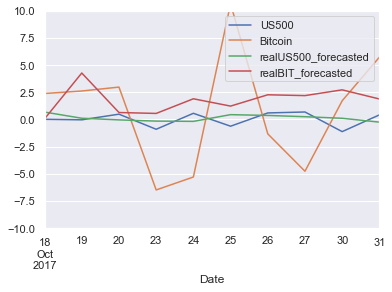

In [283]:
test = mydata_diff2[-10:]
test["realUS500_forecasted"] = forecast["realUS500_forecasted"]
test["realBIT_forecasted"] = forecast["realBIT_forecasted"]

test.plot(ylim = (-10,10))

#test
#test.plot()

# 2기 US500-Bitcoin 예측

In [284]:
adfuller_test = adfuller(ks_sp_coin_price2['KS11'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -13.920233417201658
p-value: 5.312112621733402e-26


In [285]:
adfuller_test = adfuller(ks_sp_coin_price2['US500'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -11.542605998844811
p-value: 3.6040937574832176e-21


In [286]:
adfuller_test = adfuller(ks_sp_coin_price2['Bitcoin'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -11.083992358052626
p-value: 4.2417499632057556e-20


In [287]:
mydata_diff2 = ks_sp_coin_price2.diff().dropna()
mydata_diff2

,KS11,US500,Bitcoin
Date,,,
2017-11-02,-1.704,-0.140,-0.18
2017-11-03,0.851,0.291,-2.45
2017-11-06,-0.791,-0.183,-7.63
2017-11-07,0.179,-0.146,7.88
2017-11-08,0.429,0.163,2.75
...,...,...,...
2019-12-23,-0.368,-0.407,-2.74
2019-12-24,-0.598,-0.107,1.57
2019-12-26,0.977,0.533,0.55


In [288]:
adfuller_test = adfuller(mydata_diff2['KS11'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -10.934332937105946
p-value: 9.645001482382668e-20


In [289]:
adfuller_test = adfuller(mydata_diff2['US500'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -9.926718890767818
p-value: 2.89390659361994e-17


In [290]:
adfuller_test = adfuller(mydata_diff2['Bitcoin'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -10.587548060724682
p-value: 6.656423582346981e-19


In [291]:
mydata_diff2 = mydata_diff2.loc[:, ['US500', 'Bitcoin']]

In [292]:
train = mydata_diff2.iloc[:-10,:]
test = mydata_diff2[-10:]

In [293]:
forecasting_model = VAR(train)
results_aic = []
for p in range(1,20):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


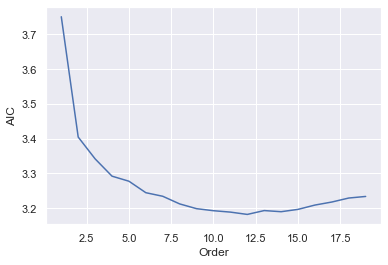

In [294]:
sns.set()
plt.plot(list(np.arange(1,20,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [295]:
results = forecasting_model.fit(10)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Mar, 2021
Time:                     15:30:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.55012
Nobs:                     494.000    HQIC:                   3.33310
Log likelihood:          -2148.54    FPE:                    24.3596
AIC:                      3.19282    Det(Omega_mle):         22.4135
--------------------------------------------------------------------
Results for equation US500
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.003482         0.044858            0.078           0.938
L1.US500           -0.934283         0.045821          -20.390           0.000
L1.Bitcoin          0.013448         0.009566            1.406      

In [296]:
laaged_values = train.values[-20:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=10), index = test.index, columns= ['realUS500_1d', 'realBIT_1d'])
forecast

,realUS500_1d,realBIT_1d
Date,,
2019-12-16,-0.082817,-1.040623
2019-12-17,0.198169,-0.628837
2019-12-18,-0.103762,0.485347
2019-12-19,0.316209,0.480371
2019-12-20,-0.102469,0.196242
2019-12-23,-0.062075,-0.347832
2019-12-24,-0.069258,-0.697385
2019-12-26,0.081073,0.272987
2019-12-27,0.076311,0.616515


In [297]:
forecast["realUS500_forecasted"] = ks_sp_coin_price2['US500'].dropna().iloc[-10-1] + forecast['realUS500_1d'].cumsum()
forecast["realBIT_forecasted"] = ks_sp_coin_price2['Bitcoin'].dropna().iloc[-10-1] + forecast['realBIT_1d'].cumsum() 
forecast

,realUS500_1d,realBIT_1d,realUS500_forecasted,realBIT_forecasted
Date,,,,
2019-12-16,-0.082817,-1.040623,-0.075817,-0.390623
2019-12-17,0.198169,-0.628837,0.122352,-1.019461
2019-12-18,-0.103762,0.485347,0.018590,-0.534114
2019-12-19,0.316209,0.480371,0.334800,-0.053744
2019-12-20,-0.102469,0.196242,0.232331,0.142498
2019-12-23,-0.062075,-0.347832,0.170256,-0.205334
2019-12-24,-0.069258,-0.697385,0.100999,-0.902719
2019-12-26,0.081073,0.272987,0.182071,-0.629732
2019-12-27,0.076311,0.616515,0.258382,-0.013217


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Date'>

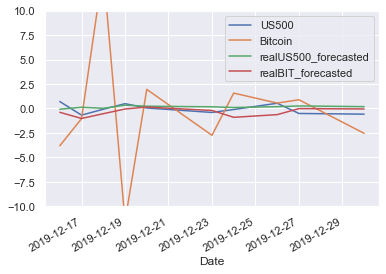

In [298]:
test = mydata_diff2[-10:]
test["realUS500_forecasted"] = forecast["realUS500_forecasted"]
test["realBIT_forecasted"] = forecast["realBIT_forecasted"]

test.plot(ylim = (-10,10))

#test
#test.plot()

# 3기 US500 - Bitcoin

In [299]:
adfuller_test = adfuller(ks_sp_coin_price3['KS11'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -10.212730001581292
p-value: 5.583224081750343e-18


In [300]:
adfuller_test = adfuller(ks_sp_coin_price3['US500'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -5.069032889464499
p-value: 1.6174655309879695e-05


In [301]:
adfuller_test = adfuller(ks_sp_coin_price3['Bitcoin'].dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -4.311925814658219
p-value: 0.000423556632384061


In [302]:
mydata_diff3 = ks_sp_coin_price3.diff().dropna()
mydata_diff3

,KS11,US500,Bitcoin
Date,,,
2020-01-03,1.083,-1.841,8.63
2020-01-06,-1.042,1.059,-0.16
2020-01-07,1.933,-0.633,-0.13
2020-01-08,-2.064,0.770,-6.29
2020-01-09,2.747,0.176,-1.52
...,...,...,...
2021-03-23,-0.878,-1.466,6.16
2021-03-24,0.733,0.216,-4.45
2021-03-25,0.679,1.071,1.99


In [303]:
adfuller_test = adfuller(mydata_diff3['KS11'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -8.225018374121777
p-value: 6.280270732472328e-13


In [304]:
mydata_diff3 = mydata_diff3.loc[:, ['US500', 'Bitcoin']]

In [305]:
train = mydata_diff3.iloc[:-10,:]
test = mydata_diff3[-10:]

In [306]:
forecasting_model = VAR(train)
results_aic = []
for p in range(1,20):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


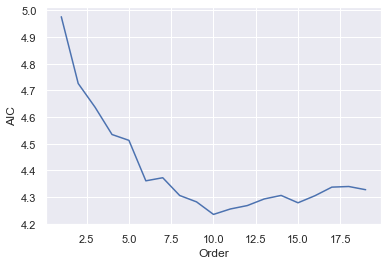

In [307]:
sns.set()
plt.plot(list(np.arange(1,20,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [308]:
results = forecasting_model.fit(10)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Mar, 2021
Time:                     15:31:26
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    4.78593
Nobs:                     276.000    HQIC:                   4.45608
Log likelihood:          -1325.68    FPE:                    69.1026
AIC:                      4.23500    Det(Omega_mle):         59.6760
--------------------------------------------------------------------
Results for equation US500
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.008060         0.108697            0.074           0.941
L1.US500           -1.073982         0.066971          -16.036           0.000
L1.Bitcoin         -0.048350         0.025533           -1.894      

In [309]:
laaged_values = train.values[-20:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=10), index = test.index, columns= ['realUS500_1d', 'realBIT_1d'])
forecast

,realUS500_1d,realBIT_1d
Date,,
2021-03-16,0.452733,7.115022
2021-03-17,-2.027246,-3.250760
2021-03-18,1.968083,1.355300
2021-03-19,-1.517202,-1.426359
2021-03-22,0.820683,2.604256
2021-03-23,-0.606337,-1.237435
2021-03-24,0.665522,1.999377
2021-03-25,0.150658,-0.608703
2021-03-26,-0.215163,-0.765811


In [310]:
forecast["realUS500_forecasted"] = ks_sp_coin_price3['US500'].dropna().iloc[-10-1] + forecast['realUS500_1d'].cumsum()
forecast["realBIT_forecasted"] = ks_sp_coin_price3['Bitcoin'].dropna().iloc[-10-1] + forecast['realBIT_1d'].cumsum() 
forecast

,realUS500_1d,realBIT_1d,realUS500_forecasted,realBIT_forecasted
Date,,,,
2021-03-16,0.452733,7.115022,1.101733,1.495022
2021-03-17,-2.027246,-3.250760,-0.925513,-1.755738
2021-03-18,1.968083,1.355300,1.042570,-0.400438
2021-03-19,-1.517202,-1.426359,-0.474632,-1.826797
2021-03-22,0.820683,2.604256,0.346052,0.777459
2021-03-23,-0.606337,-1.237435,-0.260286,-0.459976
2021-03-24,0.665522,1.999377,0.405237,1.539401
2021-03-25,0.150658,-0.608703,0.555894,0.930699
2021-03-26,-0.215163,-0.765811,0.340731,0.164888


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Date'>

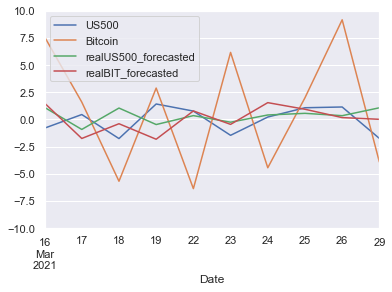

In [311]:
test = mydata_diff3[-10:]
test["realUS500_forecasted"] = forecast["realUS500_forecasted"]
test["realBIT_forecasted"] = forecast["realBIT_forecasted"]

test.plot(ylim = (-10,10))

#test
#test.plot()